In [27]:
from sklearn import datasets
digits = datasets.load_digits()

In [28]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [29]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [30]:
digits.data.shape

(1797, 64)

In [31]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

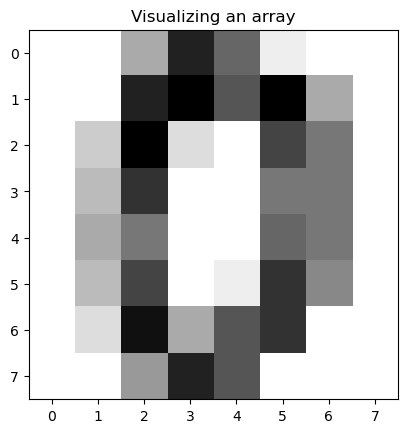

In [32]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Visualizing an array')   
# save the figure
plt.savefig('plot2.png', dpi=100, bbox_inches='tight')

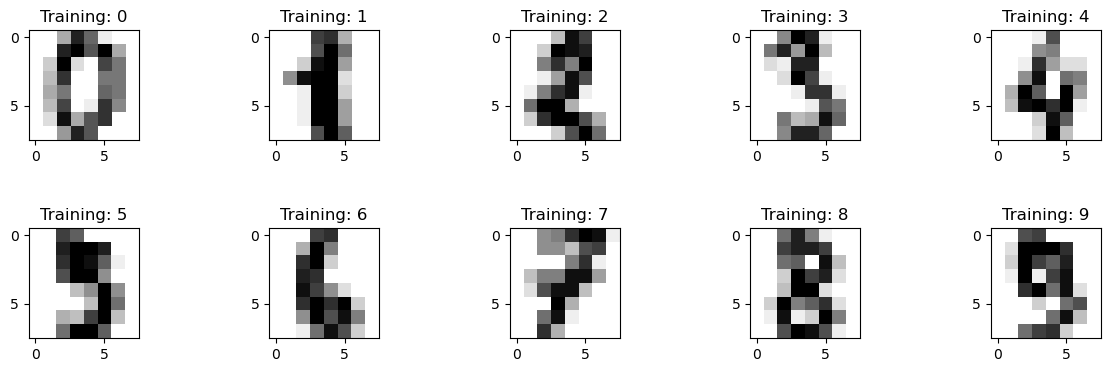

In [33]:
import numpy as np
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label, fontsize =12)
# save the figure
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')

In [35]:
n = len(digits.images)
print(n)
data = digits.images.reshape((n, -1))

1797


In [36]:
digits.target.size

1797

In [37]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.01, random_state=0)

In [39]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)

In [40]:
svc.fit(x_train,y_train)

SVC(C=100.0, gamma=0.001)

In [41]:
y_pred = svc.predict(x_test)

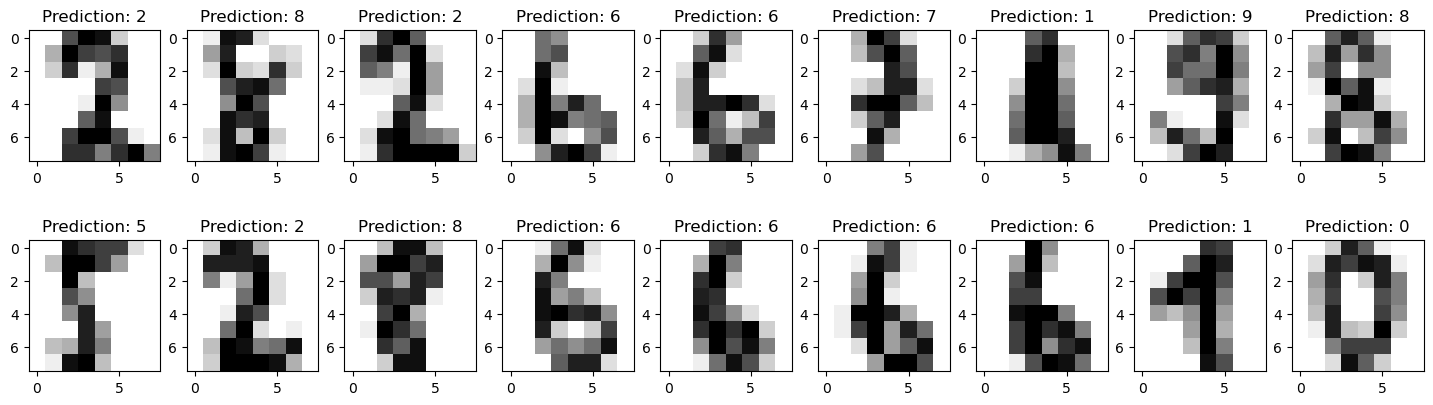

In [45]:
images_and_predictions = list(zip(x_test,y_pred))

plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:19]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

# save the figure
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')

In [43]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 1.0


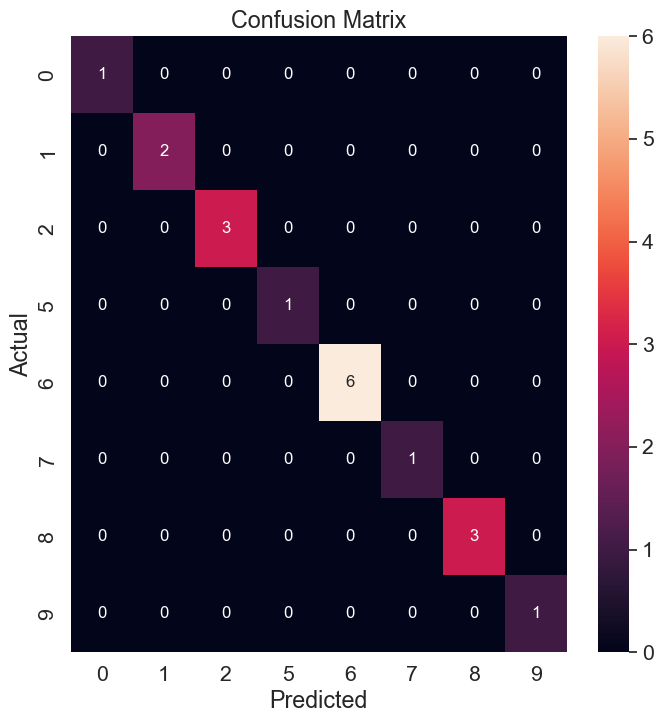

In [46]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (8,8))
sn.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.savefig('plot4.png', dpi=100, bbox_inches='tight')

In [47]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print("Classification report for SVM classifier:\n\n",cr)

Classification report for SVM classifier:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [49]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9916666666666667


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [51]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9907407407407407


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [53]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9911012235817576


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.7, random_state=0)
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [55]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9841017488076311


In [56]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.9, random_state=0)
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)


In [57]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9684796044499382


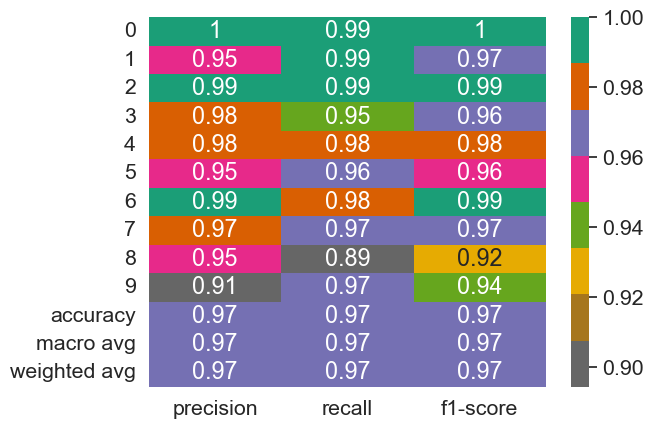

In [63]:
cr=classification_report(y_test,y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,cmap="Dark2_r")
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')
plt.show()

In [64]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [65]:
import warnings 
warnings.filterwarnings("ignore")
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [66]:
y_pred=logisticRegr.predict(x_test)


In [67]:
score = logisticRegr.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9394313967861557


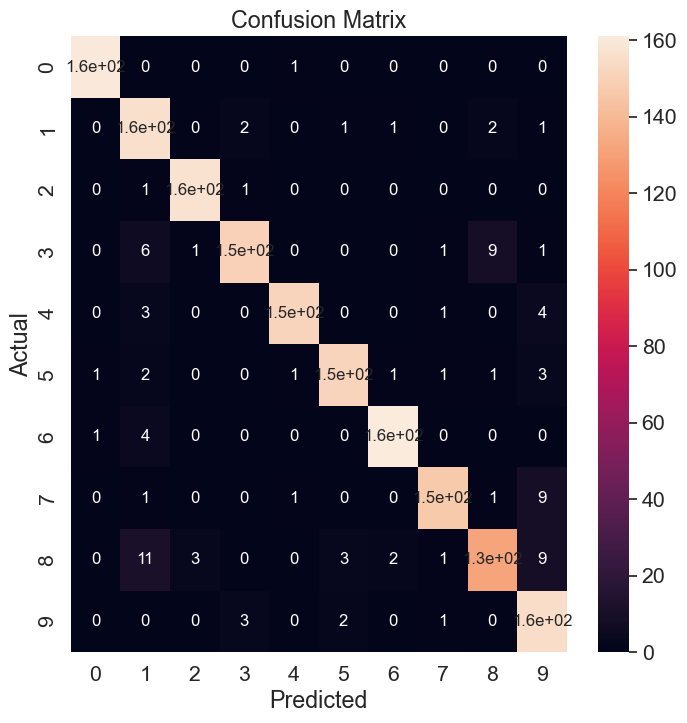

In [68]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (8,8))
sn.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.savefig('plot4.png', dpi=100, bbox_inches='tight')

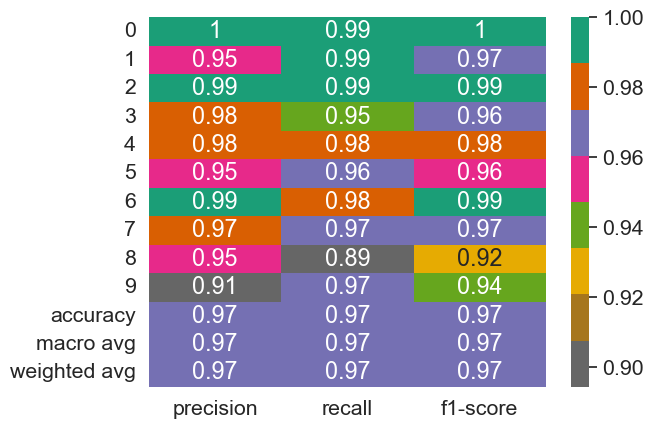

In [69]:
cr=classification_report(y_test,y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,cmap="Dark2_r")
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')
plt.show()

In [74]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

In [75]:
rc.fit(x_train, y_train)


RandomForestClassifier()

In [76]:
y_pred=rc.predict(x_test)


In [77]:
score = rc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9208899876390606


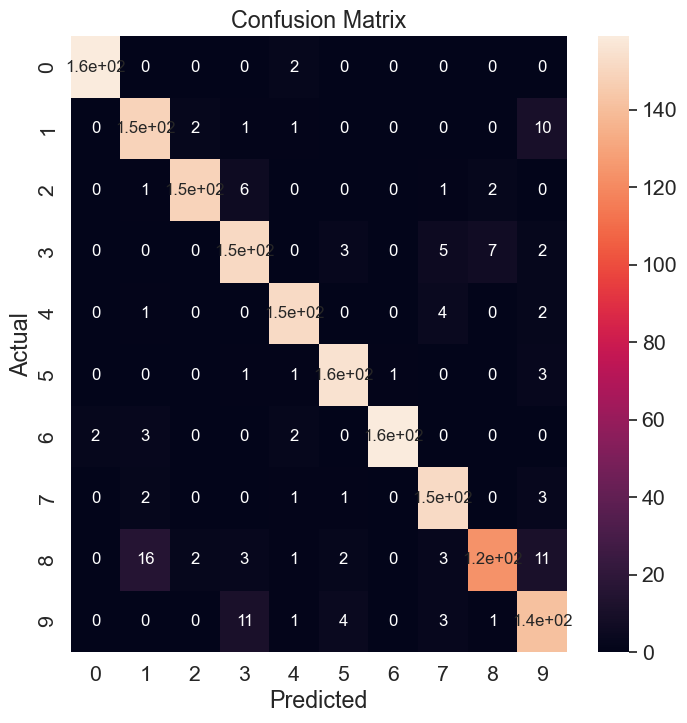

In [78]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (8,8))
sn.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.savefig('plot4.png', dpi=100, bbox_inches='tight')

Accuracy: 0.9694444444444444


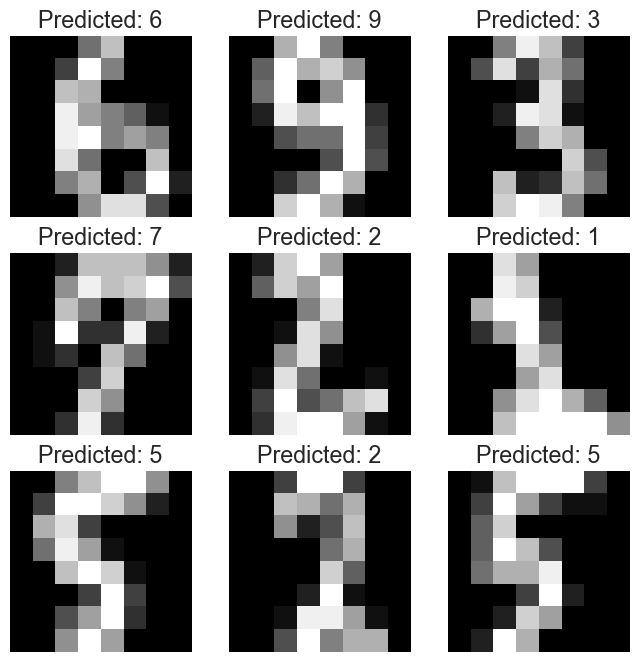

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Create an instance of Logistic Regression classifier
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot a few test samples along with their predicted labels
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Predicted: {y_pred[i]}")
    ax.axis('off')
plt.show()


<h1>Corrected Logistic Regression code</h1>

Confusion Matrix:


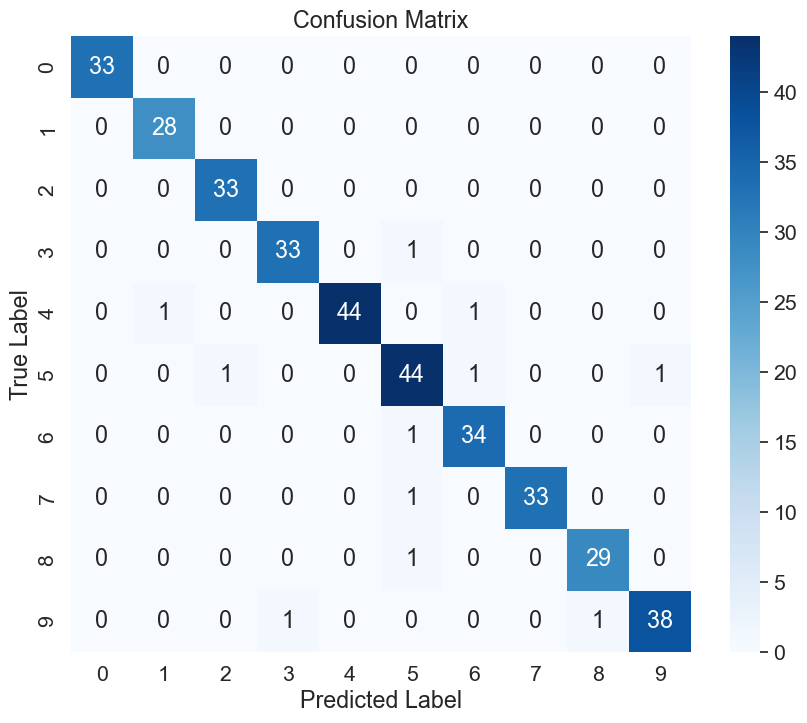

In [85]:
# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")

# Plot the confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [86]:
# Print the classification report
classification_report = metrics.classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



The outcome of the logistic regression model for digit recognition is displayed through various metrics, including the confusion matrix and the classification report.

The confusion matrix provides a tabular representation of the model's performance, showing the counts of true positive, true negative, false positive, and false negative predictions for each class. It helps in understanding how well the model is able to classify each digit.

The classification report provides a summary of key metrics such as precision, recall, F1-score, and support for each class. Precision measures the accuracy of positive predictions, recall calculates the coverage of positive instances, and F1-score combines precision and recall into a single metric. The support indicates the number of samples in each class.

By examining these metrics, you can assess the overall performance of the model for digit recognition. The accuracy, precision, recall, and F1-score values can give you an understanding of how well the model is performing on the given dataset.

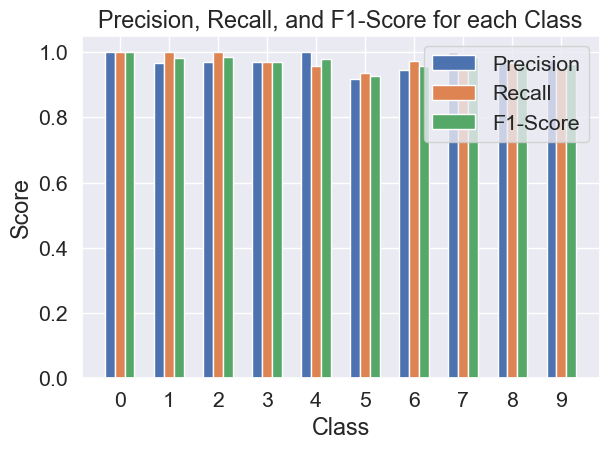

In [97]:
from sklearn.metrics import precision_recall_fscore_support


# Compute precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

# Create a list of class labels
class_labels = [str(i) for i in range(10)]

# Plot precision, recall, and F1-score for each class
x = np.arange(len(class_labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score for each Class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

fig.tight_layout()
plt.show()


<h1>Corrected Random forest code</h1>


Confusion Matrix:


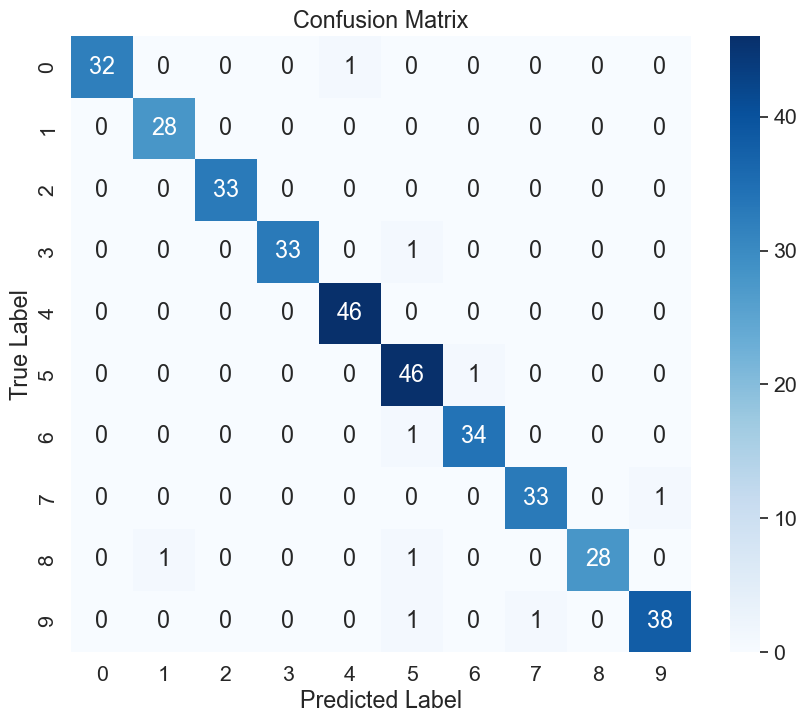

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.92      0.98      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.98       360



In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Create an instance of Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
classification_report = metrics.classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)


<h1> Corrected SVM CODE</h1>

Confusion Matrix:


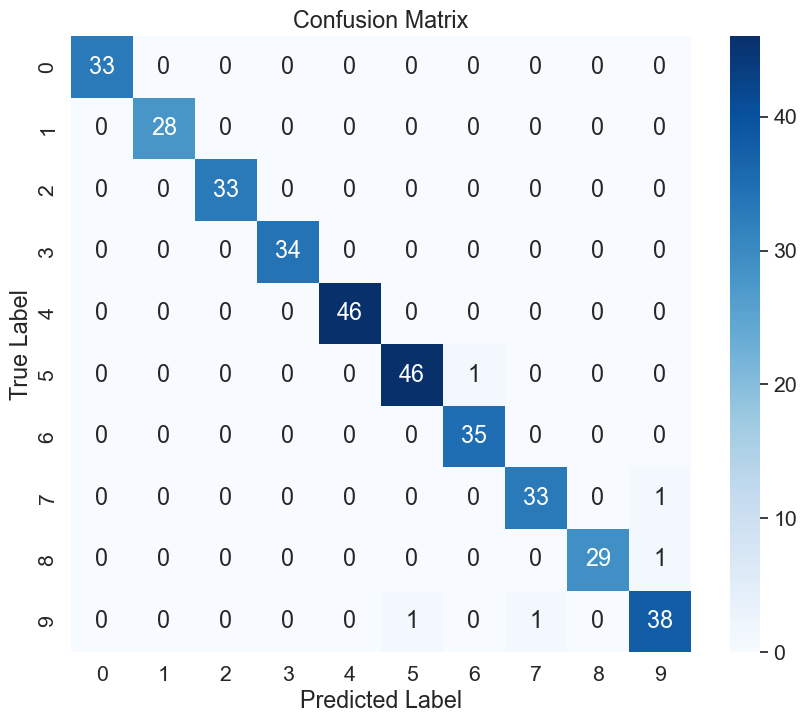

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Create an instance of SVM classifier
classifier = SVC()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
classification_report = metrics.classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)
